# Trabajo práctico número 1

## Hacer un programa que utilice un Algoritmo Genético Canónico para buscar un máximo de la función:

#### f(x) = (x/coef)2 en el dominio [0 , 2^(30 - 1)]
donde coef = 2^(30-1)
teniendo en cuenta los siguientes datos:

1– Probabilidad de Crossover = 0,75

2– Probabilidad de Mutación = 0,05

3– Población Inicial: 10 individuos

4– Ciclos del programa: 200

5– Método de Selección: Ruleta

6– Método de Crossover: 1 Punto

7– Método de Mutación: invertida

#### El espacio solución estara formado por cromosomas de longitud 30
 y cada gen sera un dígito
binario 0 o 1

### Constantes

In [3]:
PROB_CROSSOVER = 0.75
PROB_MUTACION = 0.05
CICLOS = 200
CANTIDAD_POBLACION = 10
COEF = 1073741823 # 2^29

### Librerías necesarias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generando población inicial aleatoria

In [5]:
def poblacionInicial():
    rng = np.random.default_rng() # Random Number Generator
    # El 12345 es la semilla, poner sin semilla para q en cada ejecución genere nuevos aleatorios.
    poblacion_decimal = rng.integers(low=0, high=COEF, size=CANTIDAD_POBLACION)
    return poblacion_decimal
poblacion_decimal = poblacionInicial()
poblacion_decimal

array([ 343919852, 1029262049,  133725417,  655534870,  258343673,
        335376641,   47211466,  813279475,  719082944,  874951157],
      dtype=int64)

#### Convirtiendo la población inicial a binario

In [6]:
def convertirPoblacion(pob_ini, bin=True): # Pasar False para convertir a decimal
    pob_fin = []
    contador = 0
    for numero in pob_ini:
        if bin:
            # convirtiendo cada número decimal en binario de 8 dígitos.
            pob_fin.append(format(numero,'030b'))
        else:
            pob_fin.append(int(str(numero), 2))
    return pob_fin

poblacion_binarios= convertirPoblacion(poblacion_decimal)
poblacion_binarios

['010100011111111100110011101100',
 '111101010110010100101011100001',
 '000111111110000111110011101001',
 '100111000100101010101100010110',
 '001111011001100000001011111001',
 '010011111111010111000100000001',
 '000010110100000110001111001010',
 '110000011110011010100011110011',
 '101010110111000101010111000000',
 '110100001001101011000111110101']

### Función objetivo

In [7]:
#(x/coef)2
# Pasar población decimal
def funcionObjetivo(pob):
    colObjetivo=[]
    # El nombre cromosoma es por semántica, en realidad va a trabajar con cada valor decimal
    for cromosoma in pob:
        colObjetivo.append((int(cromosoma)/int(COEF))**2)
    #convertir lista en numpy arrray (para operaciones matemáticas)
    npColObjetivo = np.array(colObjetivo)
    return npColObjetivo

### Generando un marco de datos

In [8]:
def generarDataFrame(pob_dec, pob_bin):
    data = {'Decimales': pob_dec, 'Binarios': pob_bin, 'FuncionObjetivo':funcionObjetivo(pob_dec)}
    dataFrame = pd.DataFrame(data)
    dataFrame['Fitness'] = dataFrame['FuncionObjetivo'] / dataFrame['FuncionObjetivo'].sum()
    return dataFrame

marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
display(marcoDeDatos)

,Decimales,Binarios,FuncionObjetivo,Fitness
0,343919852,010100011111111100110011101100,0.102592,0.031535
1,1029262049,111101010110010100101011100001,0.918866,0.282444
2,133725417,000111111110000111110011101001,0.015511,0.004768
3,655534870,100111000100101010101100010110,0.372728,0.114570
4,258343673,001111011001100000001011111001,0.057889,0.017794
5,335376641,010011111111010111000100000001,0.097559,0.029988
6,47211466,000010110100000110001111001010,0.001933,0.000594
7,813279475,110000011110011010100011110011,0.573693,0.176344
8,719082944,101010110111000101010111000000,0.448496,0.137860
9,874951157,110100001001101011000111110101,0.664000,0.204102


#### Estadisticas

In [9]:
def generarEstadisticas(dataFrame):
    stats = {'Suma':[ dataFrame['FuncionObjetivo'].sum(), dataFrame['Fitness'].sum() ], 'Promedio': [ dataFrame['FuncionObjetivo'].mean(), dataFrame['Fitness'].mean() ], 'Máximo': [ dataFrame['FuncionObjetivo'].max(), dataFrame['Fitness'].max() ], 'Mínimo': [ dataFrame['FuncionObjetivo'].min(), dataFrame['Fitness'].min() ]}
    dataFrame_stats = pd.DataFrame(stats, index = ['Función objetivo', 'Fitness'])
    return dataFrame_stats, stats

marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)

display(marcoDeDatos_stats)

,Suma,Promedio,Máximo,Mínimo
Función objetivo,3.253266,0.325327,0.918866,0.001933
Fitness,1.000000,0.100000,0.282444,0.000594


### Generando una nueva población a partir de otra

Selección de padres para la próxima generación

#### Método ruleta

In [10]:
def ruleta(dataFrame): #pasar marco de datos
    probabilidades = np.array(dataFrame['Fitness']) #Asigna probabilidad basada en el fitness
    cromosomas = np.array(dataFrame['Binarios'])
    np.random.seed() 
    salida = np.random.choice(cromosomas, size=int(CANTIDAD_POBLACION), p=probabilidades)
    return salida

cromosomasPadresRuleta = ruleta(marcoDeDatos)
cromosomasPadresRuleta

array(['010100011111111100110011101100', '110100001001101011000111110101',
       '111101010110010100101011100001', '110000011110011010100011110011',
       '110000011110011010100011110011', '110000011110011010100011110011',
       '110000011110011010100011110011', '111101010110010100101011100001',
       '111101010110010100101011100001', '111101010110010100101011100001'],
      dtype=object)

#### Método torneo

In [11]:
def torneo(dataFrame):
    salida = []
    fitness = np.array(dataFrame['Fitness'])
    cromosomas = np.array(dataFrame['Binarios'])
    for i in range(0,10):
        posiblesCantidades = [ x for x in range(1,11)]
        np.random.seed() 
        cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
        miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
        ganador = np.amax(miembrosTorneo)
        indiceGanador = np.where(fitness == ganador) # retorna ndarray
        cromosomaGanador = cromosomas[indiceGanador[0][0]]
        salida.append(cromosomaGanador)
    return salida

cromosomasPadresTorneo = torneo(marcoDeDatos)
cromosomasPadresTorneo

['111101010110010100101011100001',
 '111101010110010100101011100001',
 '111101010110010100101011100001',
 '111101010110010100101011100001',
 '110000011110011010100011110011',
 '110100001001101011000111110101',
 '111101010110010100101011100001',
 '111101010110010100101011100001',
 '101010110111000101010111000000',
 '110100001001101011000111110101']

Test de prueba (podemos borrar desp)

In [12]:
fitness = np.array(marcoDeDatos['Fitness'])
cromosomas = np.array(marcoDeDatos['Binarios'])
posiblesCantidades = [ x for x in range(1,11)]
cantidadMiembrosTorneo = np.random.choice(posiblesCantidades, size=1)
miembrosTorneo = np.random.choice(fitness, size=cantidadMiembrosTorneo[0], replace=False) #Trabaja directamente con los fitness de los cromósomas
ganador = np.amax(miembrosTorneo)
indiceGanador = np.where(fitness == ganador)
print(miembrosTorneo)
print("Cantidad: "+str(cantidadMiembrosTorneo[0]))
print("Fitness ganador: "+str(ganador))
print("Indice: "+str(indiceGanador[0][0]))
print("Cromosoma: "+str(cromosomas[indiceGanador[0][0]]))

[0.03153517 0.02998791 0.0047677  0.1378601 ]
Cantidad: 4
Fitness ganador: 0.13786010341521918
Indice: 8
Cromosoma: 101010110111000101010111000000


#### Crossover

In [13]:
def crossover(padres): #Pasar ndarray cromosomas padres
    hijos = []
    for i in range(0,10,2):
        opciones=[True, False]
        np.random.seed() 
        prob_cross = np.array([PROB_CROSSOVER,(1-PROB_CROSSOVER)]) # Probabilidades de cada opción
        cross = np.random.choice(opciones, size=1, p=prob_cross)
        if cross[0]:
            posiciones = [x for x in range(0, 30)]
            probCorte = [1/30 for x in range(0, 30)]
            corte = np.random.choice(posiciones, size=1, p=probCorte) # Devuelve ndarray de 1 elemento
            posicionCorte = corte[0] 
            primerTiraGenesPadre1 = padres[i][0:posicionCorte]
            segundaTiraGenesPadre1 = padres[i][posicionCorte:30]
            primerTiraGenesPadre2 = padres[i+1][0:posicionCorte]
            segundaTiraGenesPadre2 = padres[i+1][posicionCorte:30]
            hijos.append(primerTiraGenesPadre1 + segundaTiraGenesPadre2) # Hijo 1
            hijos.append(primerTiraGenesPadre2 + segundaTiraGenesPadre1) # Hijo 2
        else:
            hijos.append(padres[i])
            hijos.append(padres[i+1])
    return hijos

##### Crossover ruleta

In [14]:
cromosomasHijosRuleta = crossover(cromosomasPadresRuleta)
cromosomasHijosRuleta

['010100011001101011000111110101',
 '110100001111111100110011101100',
 '111101010110010100101011100001',
 '110000011110011010100011110011',
 '110000011110011010100011110011',
 '110000011110011010100011110011',
 '110000011110010100101011100001',
 '111101010110011010100011110011',
 '111101010110010100101011100001',
 '111101010110010100101011100001']

##### Crossover torneo

In [15]:
cromosomasHijosTorneo = crossover(cromosomasPadresTorneo)
print(cromosomasHijosTorneo)

['111101010110010100101011100001', '111101010110010100101011100001', '111101010110010100101011100001', '111101010110010100101011100001', '110000011110011010100011110011', '110100001001101011000111110101', '111101010110010100101011100001', '111101010110010100101011100001', '101010110111000101010111000001', '110100001001101011000111110100']


#### Mutación

In [16]:
def mutacion(cromosomas):
    hijos = []
    rng = np.random.default_rng() # Random Number Generator
    for i in range(0,10):
        mutar = rng.random()
        
        if (PROB_MUTACION > mutar):
            posicion = rng.integers(low=0, high=29, size=1)
            #print("Posición: " + str(posicion))
            #print(cromosomas[i][posicion[0]])
            #print(cromosomas[i])
            if ( int(cromosomas[i][posicion[0]]) == 1 ):
                cromosoma = list(cromosomas[i]) # Convierte el lista al cromosoma seleccionado
                # Lo hice así porque python no permite asignar valores a una pisición de un array
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '0' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)  # volverlo a convertir en int (o podría ser a array)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
            else:
                cromosoma = list(cromosomas[i]) 
                #print(cromosomas[i])
                cromosoma[posicion[0]] = '1' # cambia el gen indicado
                cromosomaMutado =''.join(cromosoma)
                #print(cromosomaMutado)
                hijos.append(cromosomaMutado)
                
        else:
            hijos.append(cromosomas[i])
    return hijos 

hijosmutados = mutacion(cromosomasHijosRuleta)

hijosmutados

['010100011001101011000111110101',
 '110100001111111100110011101100',
 '111101010110010100101011100001',
 '110000011110011010100011110011',
 '110000011110011010100011110011',
 '110000011110011010100010110011',
 '110000011110010100101011100001',
 '111101010110011010100011110011',
 '111101010110010100101011100001',
 '111101010110010100101011100001']

### Main

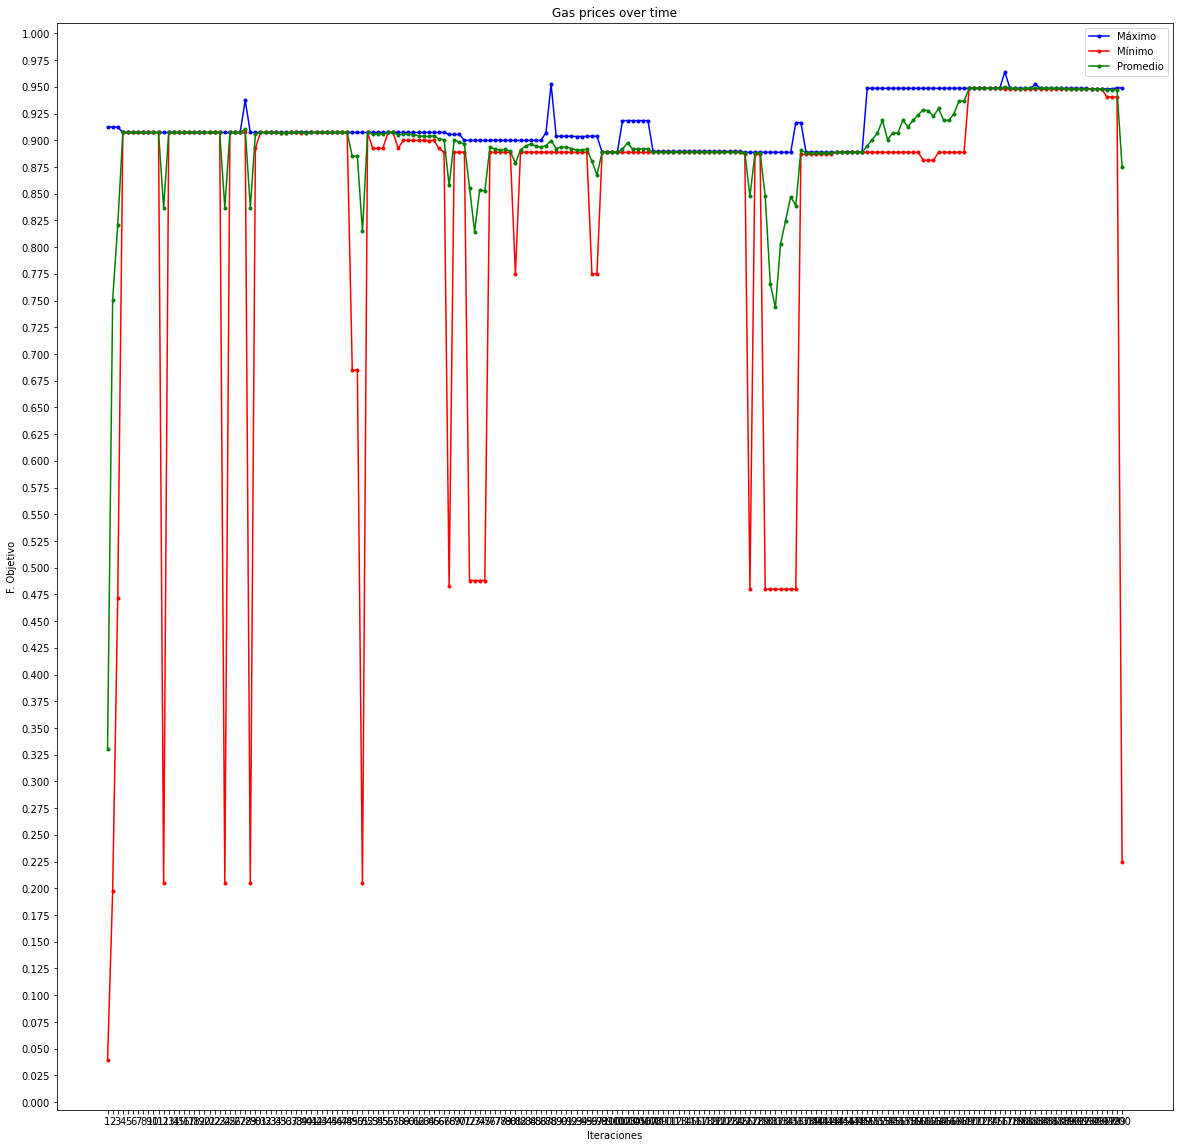

In [17]:
estadisticas = {"Iteración":[x for x in range(1,201)], "Máximo":[], "Mínimo":[], "Promedio":[]}
poblacion_decimal = poblacionInicial()
poblacion_binarios = convertirPoblacion(poblacion_decimal)
for i in range(0,200):
    marcoDeDatos = generarDataFrame(poblacion_decimal, poblacion_binarios)
    marcoDeDatos_stats, stats = generarEstadisticas(marcoDeDatos)
    estadisticas["Máximo"].append(stats['Máximo'][0])
    estadisticas["Mínimo"].append(stats['Mínimo'][0])
    estadisticas["Promedio"].append(stats['Promedio'][0])
    cromosomasPadresRuleta = ruleta(marcoDeDatos)
    cromosomasHijosRuleta = crossover(cromosomasPadresRuleta)
    cromosomasHijosMutados = mutacion(cromosomasHijosRuleta)
    poblacion_binarios = cromosomasHijosMutados
    poblacion_decimal = convertirPoblacion(poblacion_binarios, False)
    
# TODO hacer esto una función aparte
# opciones extra hacer mismo grafico sin mutación. (Se ve como se estanca la función en maximos locales)
plt.figure(figsize=(20,20))
plt.plot(estadisticas["Iteración"], estadisticas["Máximo"], 'b.-', label="Máximo")
plt.plot(estadisticas["Iteración"], estadisticas["Mínimo"], 'r.-', label="Mínimo")
plt.plot(estadisticas["Iteración"], estadisticas["Promedio"], 'g.-', label="Promedio")
plt.legend()
plt.title("Gas prices over time")
plt.xticks(estadisticas["Iteración"][::1])
plt.yticks(np.arange(0, 1.01, step=0.025))
plt.xlabel("Iteraciones")
plt.ylabel("F. Objetivo")
plt.show()